## Graph Basics

In [1]:
import networkx as nx

In [2]:
G = nx.karate_club_graph()

In [3]:
type(G) #undirected graph

networkx.classes.graph.Graph

In [4]:
import matplotlib.pyplot as plt

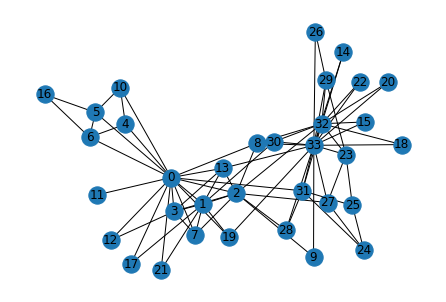

In [5]:
nx.draw(G , with_labels =True)

In [6]:
def average_degree(num_edges, num_nodes):
  # TODO: Implement this function that takes number of edges
  # and number of nodes, and returns the average node degree of 
  # the graph. Round the result to nearest integer (for example 
  # 3.3 will be rounded to 3 and 3.7 will be rounded to 4)

  avg_degree = 0

  ############# Your code here ############
  avg_degree = round(2 * num_edges / num_nodes)
  #########################################

  return avg_degree

num_edges = G.number_of_edges()
num_nodes = G.number_of_nodes()
avg_degree = average_degree(num_edges, num_nodes)
print("Average degree of karate club network is {}".format(avg_degree))

Average degree of karate club network is 5


In [7]:
import numpy as np

In [8]:
def average_clustering_coefficient(G):
  # TODO: Implement this function that takes a nx.Graph
  # and returns the average clustering coefficient. Round 
  # the result to 2 decimal places (for example 3.333 will
  # be rounded to 3.33 and 3.7571 will be rounded to 3.76)

  avg_cluster_coef = 0

  ############# Your code here ############
  ## Note: 
  ## 1: Please use the appropriate NetworkX clustering function
  avg_cluster_coef = round(np.array(list(nx.clustering(G).items())).sum(axis= 0)[1]/34 , 2)
  #########################################

  return avg_cluster_coef

avg_cluster_coef = average_clustering_coefficient(G)
print("Average clustering coefficient of karate club network is {}".format(avg_cluster_coef))

Average clustering coefficient of karate club network is 0.57


In [9]:
def one_iter_pagerank(G, beta, r0, node_id):
  # TODO: Implement this function that takes a nx.Graph, beta, r0 and node id.
  # The return value r1 is one interation PageRank value for the input node.
  # Please round r1 to 2 decimal places.

  r1 = 0

  ############# Your code here ############
  ## Note: 
  ## 1: You should not use nx.pagerank
  for neighbour in G.neighbors(node_id) : 
        r1 += beta*(r0 / G.degree[neighbour]) 
        
  r1 += (1- beta)/G.number_of_nodes()
  r1 = round(r1 , 2)
    
  #########################################

  return r1

beta = 0.8
r0 = 1 / G.number_of_nodes()
node = 0
r1 = one_iter_pagerank(G, beta, r0, node)
print("The PageRank value for node 0 after one iteration is {}".format(r1))

The PageRank value for node 0 after one iteration is 0.13


In [10]:
def closeness_centrality(G, node=5):
  # TODO: Implement the function that calculates closeness centrality 
  # for a node in karate club network. G is the input karate club 
  # network and node is the node id in the graph. Please round the 
  # closeness centrality result to 2 decimal places.

  closeness = 0

  ## Note:
  ## 1: You can use networkx closeness centrality function.
  ## 2: Notice that networkx closeness centrality returns the normalized 
  ## closeness directly, which is different from the raw (unnormalized) 
  ## one that we learned in the lecture.
  closeness = nx.closeness_centrality(G, u=node)
  closeness /= len(nx.node_connected_component(G, node)) - 1

  closeness = round(closeness, 2)
  #########################################

  return closeness

node = 0
closeness = closeness_centrality(G, node=node)
print("The node 5 has closeness centrality {}".format(closeness))

The node 5 has closeness centrality 0.02


## Working with Tensors

In [11]:
import torch
print(torch.__version__)

1.12.0+cu116


In [12]:
torch.cuda.is_available()

True

In [13]:
torch.cuda.device_count()

1

In [14]:
torch.cuda.current_device()

0

In [15]:
torch.cuda.device(0)

In [16]:
# Generate 3 x 4 tensor with all ones
ones = torch.ones(3, 4)
print(ones)

# Generate 3 x 4 tensor with all zeros
zeros = torch.zeros(3, 4)
print(zeros)

# Generate 3 x 4 tensor with random values on the interval [0, 1)
random_tensor = torch.rand(3, 4)
print(random_tensor)

# Get the shape of the tensor
print(ones.shape)

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])
tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])
tensor([[0.8980, 0.1276, 0.8574, 0.0224],
        [0.5229, 0.4742, 0.7780, 0.4857],
        [0.3267, 0.3044, 0.6042, 0.0960]])
torch.Size([3, 4])


In [17]:
zeros = torch.zeros(3, 4, dtype=torch.float32)
print(zeros.dtype)

# Change the tensor dtype to 64-bit integer
zeros = zeros.type(torch.long)
print(zeros.dtype)

torch.float32
torch.int64


In [18]:
def graph_to_edge_list(G):
  # TODO: Implement the function that returns the edge list of
  # an nx.Graph. The returned edge_list should be a list of tuples
  # where each tuple is a tuple representing an edge connected 
  # by two nodes.

  edge_list = []

  ############# Your code here ############
  edge_list = nx.edges(G)
  #########################################

  return edge_list

def edge_list_to_tensor(edge_list):
  # TODO: Implement the function that transforms the edge_list to
  # tensor. The input edge_list is a list of tuples and the resulting
  # tensor should have the shape [2 x len(edge_list)].

  

  ############# Your code here ############
  edge_index = torch.tensor(np.array(list(edge_list))).T
  #########################################

  return edge_index

pos_edge_list = graph_to_edge_list(G)
pos_edge_index = edge_list_to_tensor(pos_edge_list)
print("The pos_edge_index tensor has shape {}".format(pos_edge_index.shape))
print("The pos_edge_index tensor has sum value {}".format(torch.sum(pos_edge_index)))

The pos_edge_index tensor has shape torch.Size([2, 78])
The pos_edge_index tensor has sum value 2535


In [19]:
import random

def sample_negative_edges(G, num_neg_samples):
  # TODO: Implement the function that returns a list of negative edges.
  # The number of sampled negative edges is num_neg_samples. You do not
  # need to consider the corner case when the number of possible negative edges
  # is less than num_neg_samples. It should be ok as long as your implementation 
  # works on the karate club network. In this implementation, self loops should 
  # not be considered as either a positive or negative edge. Also, notice that 
  # the karate club network is an undirected graph, if (0, 1) is a positive 
  # edge, do you think (1, 0) can be a negative one?

    neg_edge_list = []

  ############# Your code here ############
    pos_edge_list = graph_to_edge_list(G)
    for node1 in G.nodes():
        for node2 in G.nodes():
            if node1 < node2:
                if (node1, node2) not in pos_edge_list:
                    neg_edge_list.append((node1, node2))
    neg_edge_list = random.sample(neg_edge_list, num_neg_samples)
  #########################################

    return neg_edge_list

# Sample 78 negative edges
neg_edge_list = sample_negative_edges(G, len(pos_edge_list))

# Transform the negative edge list to tensor
neg_edge_index = edge_list_to_tensor(neg_edge_list)
print("The neg_edge_index tensor has shape {}".format(neg_edge_index.shape))

# Which of following edges can be negative ones?
edge_1 = (7, 1)
edge_2 = (1, 33)
edge_3 = (33, 22)
edge_4 = (0, 4)
edge_5 = (4, 2)

############# Your code here ############
## Note:
## 1: For each of the 5 edges, print whether it can be negative edge
pos_edge_list = graph_to_edge_list(G)
for edge in [edge_1, edge_2, edge_3, edge_4, edge_5]:
    if edge in pos_edge_list:
        print("No")
    else:
        print("Yes")
#########################################

The neg_edge_index tensor has shape torch.Size([2, 78])
No
Yes
No
No
Yes


## Node Embedding Learning

In [20]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

print(torch.__version__)

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


1.12.0+cu116


In [21]:
# Initialize an embedding layer
# Suppose we want to have embedding for 4 items (e.g., nodes)
# Each item is represented with 8 dimensional vector

emb_sample = nn.Embedding(num_embeddings=4, embedding_dim=8)
print('Sample embedding layer: {}'.format(emb_sample))

Sample embedding layer: Embedding(4, 8)


In [22]:
# Select an embedding in emb_sample
id = torch.LongTensor([1])
print(emb_sample(id))

# Select multiple embeddings
ids = torch.LongTensor([1, 3])
print(emb_sample(ids))

# Get the shape of the embedding weight matrix
shape = emb_sample.weight.data.shape
print(shape)

# Overwrite the weight to tensor with all ones
emb_sample.weight.data = torch.ones(shape)

# Let's check if the emb is indeed initilized
ids = torch.LongTensor([0,1,2, 3])
print(emb_sample(ids))

tensor([[ 0.8214, -0.6340, -0.5403, -0.9771,  0.5627, -0.6153, -1.9443, -0.2390]],
       grad_fn=<EmbeddingBackward0>)
tensor([[ 0.8214, -0.6340, -0.5403, -0.9771,  0.5627, -0.6153, -1.9443, -0.2390],
        [-0.4970,  0.7978,  0.1936,  0.1587, -0.3720, -0.1713, -0.0838,  1.3219]],
       grad_fn=<EmbeddingBackward0>)
torch.Size([4, 8])
tensor([[1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1.]], grad_fn=<EmbeddingBackward0>)


In [23]:
# Please do not change / reset the random seed
torch.manual_seed(1)

def create_node_emb(num_node=34, embedding_dim=16):
  # TODO: Implement this function that will create the node embedding matrix.
  # A torch.nn.Embedding layer will be returned. You do not need to change 
  # the values of num_node and embedding_dim. The weight matrix of returned 
  # layer should be initialized under uniform distribution. 

  emb = None

  ############# Your code here ############
  emb = nn.Embedding(num_embeddings=num_node, embedding_dim=embedding_dim)
  emb.weight.data = torch.rand(num_node,embedding_dim)
  #########################################

  return emb

emb = create_node_emb()
ids = torch.LongTensor([0, 3])

# Print the embedding layer
print("Embedding: {}".format(emb))

# An example that gets the embeddings for node 0 and 3
print(emb(ids))

Embedding: Embedding(34, 16)
tensor([[0.2114, 0.7335, 0.1433, 0.9647, 0.2933, 0.7951, 0.5170, 0.2801, 0.8339,
         0.1185, 0.2355, 0.5599, 0.8966, 0.2858, 0.1955, 0.1808],
        [0.7486, 0.6546, 0.3843, 0.9820, 0.6012, 0.3710, 0.4929, 0.9915, 0.8358,
         0.4629, 0.9902, 0.7196, 0.2338, 0.0450, 0.7906, 0.9689]],
       grad_fn=<EmbeddingBackward0>)


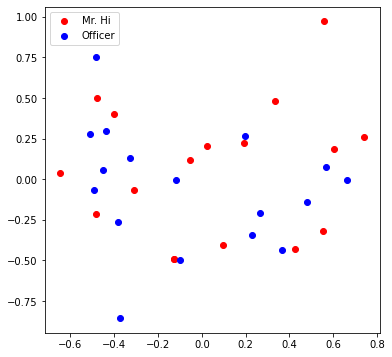

In [24]:
def visualize_emb(emb):
  X = emb.weight.data.numpy()
  pca = PCA(n_components=4)
  components = pca.fit_transform(X)
  plt.figure(figsize=(6, 6))
  club1_x = []
  club1_y = []
  club2_x = []
  club2_y = []
  for node in G.nodes(data=True):
    if node[1]['club'] == 'Mr. Hi':
      club1_x.append(components[node[0]][2])
      club1_y.append(components[node[0]][3])
    else:
      club2_x.append(components[node[0]][2])
      club2_y.append(components[node[0]][3])
  plt.scatter(club1_x, club1_y, color="red", label="Mr. Hi")
  plt.scatter(club2_x, club2_y, color="blue", label="Officer")
  plt.legend()
  plt.show()

# Visualize the initial random embeddding
visualize_emb(emb)

In [25]:
from torch.optim import SGD
import torch.nn as nn

def accuracy(pred, label):
    # TODO: Implement the accuracy function. This function takes the 
    # pred tensor (the resulting tensor after sigmoid) and the label 
    # tensor (torch.LongTensor). Predicted value greater than 0.5 will 
    # be classified as label 1. Else it will be classified as label 0.
    # The returned accuracy should be rounded to 4 decimal places. 
    # For example, accuracy 0.82956 will be rounded to 0.8296.

    accu = 0.0

    ############# Your code here ############
    accu = round(np.sum(np.array(label) == pred)/len(pred) , 4)
    #########################################

    return accu

def train(emb, loss_fn, sigmoid, train_label, train_edge):
    # TODO: Train the embedding layer here. You can also change epochs and 
    # learning rate. In general, you need to implement: 
    # (1) Get the embeddings of the nodes in train_edge
    # (2) Dot product the embeddings between each node pair
    # (3) Feed the dot product result into sigmoid
    # (4) Feed the sigmoid output into the loss_fn
    # (5) Print both loss and accuracy of each epoch 
    # (6) Update the embeddings using the loss and optimizer 
    # (as a sanity check, the loss should decrease during training)

    epochs = 500
    learning_rate = 0.1

    optimizer = SGD(emb.parameters(), lr=learning_rate, momentum=0.9)
    
    for i in range(epochs):
        optimizer.zero_grad()
        node_emb = emb(train_edge)
        dot_product = torch.sum(node_emb[0] * node_emb[1], -1)
        result = sigmoid(dot_product)
        loss = loss_fn(result, train_label)
        pred = np.array(result > 0.5)
        accu = accuracy(pred , train_label)
            
        print("Epoch:", i, "Loss:", loss.item(), 
          "Acc:", accu)
        loss.backward()
        optimizer.step()
    ############# Your code here ############
    #########################################
    return emb

loss_fn = nn.BCELoss()
sigmoid = nn.Sigmoid()

print(pos_edge_index.shape)

# Generate the positive and negative labels
pos_label = torch.ones(pos_edge_index.shape[1], )
neg_label = torch.zeros(neg_edge_index.shape[1], )

# Concat positive and negative labels into one tensor
train_label = torch.cat([pos_label, neg_label], dim=0)

# Concat positive and negative edges into one tensor
# Since the network is very small, we do not split the edges into val/test sets
train_edge = torch.cat([pos_edge_index, neg_edge_index], dim=1)
print(train_edge.shape)
emb = create_node_emb()
emb= train(emb, loss_fn, sigmoid, train_label, train_edge)

torch.Size([2, 78])
torch.Size([2, 156])
Epoch: 0 Loss: 1.9510881900787354 Acc: 0.5
Epoch: 1 Loss: 1.9377182722091675 Acc: 0.5
Epoch: 2 Loss: 1.9125335216522217 Acc: 0.5
Epoch: 3 Loss: 1.8771106004714966 Acc: 0.5
Epoch: 4 Loss: 1.833012342453003 Acc: 0.5
Epoch: 5 Loss: 1.7817574739456177 Acc: 0.5
Epoch: 6 Loss: 1.7248022556304932 Acc: 0.5
Epoch: 7 Loss: 1.6635223627090454 Acc: 0.5
Epoch: 8 Loss: 1.599200963973999 Acc: 0.5
Epoch: 9 Loss: 1.5330188274383545 Acc: 0.5
Epoch: 10 Loss: 1.4660462141036987 Acc: 0.5
Epoch: 11 Loss: 1.3992372751235962 Acc: 0.5
Epoch: 12 Loss: 1.3334225416183472 Acc: 0.5
Epoch: 13 Loss: 1.2693097591400146 Acc: 0.5
Epoch: 14 Loss: 1.2074801921844482 Acc: 0.5
Epoch: 15 Loss: 1.1483935117721558 Acc: 0.5
Epoch: 16 Loss: 1.0923917293548584 Acc: 0.5
Epoch: 17 Loss: 1.0397089719772339 Acc: 0.5
Epoch: 18 Loss: 0.9904808402061462 Acc: 0.5
Epoch: 19 Loss: 0.9447575211524963 Acc: 0.5
Epoch: 20 Loss: 0.9025160074234009 Acc: 0.5128
Epoch: 21 Loss: 0.8636741638183594 Acc: 0.51

209 Loss: 0.11678682267665863 Acc: 1.0
Epoch: 210 Loss: 0.11576652526855469 Acc: 1.0
Epoch: 211 Loss: 0.11475774645805359 Acc: 1.0
Epoch: 212 Loss: 0.11376037448644638 Acc: 1.0
Epoch: 213 Loss: 0.11277426034212112 Acc: 1.0
Epoch: 214 Loss: 0.11179932206869125 Acc: 1.0
Epoch: 215 Loss: 0.11083539575338364 Acc: 1.0
Epoch: 216 Loss: 0.10988237708806992 Acc: 1.0
Epoch: 217 Loss: 0.10894014686346054 Acc: 1.0
Epoch: 218 Loss: 0.10800857841968536 Acc: 1.0
Epoch: 219 Loss: 0.10708755254745483 Acc: 1.0
Epoch: 220 Loss: 0.1061769351363182 Acc: 1.0
Epoch: 221 Loss: 0.10527664422988892 Acc: 1.0
Epoch: 222 Loss: 0.10438653826713562 Acc: 1.0
Epoch: 223 Loss: 0.10350648313760757 Acc: 1.0
Epoch: 224 Loss: 0.1026364117860794 Acc: 1.0
Epoch: 225 Loss: 0.10177615284919739 Acc: 1.0
Epoch: 226 Loss: 0.10092563927173615 Acc: 1.0
Epoch: 227 Loss: 0.10008472204208374 Acc: 1.0
Epoch: 228 Loss: 0.09925331175327301 Acc: 1.0
Epoch: 229 Loss: 0.098431296646595 Acc: 1.0
Epoch: 230 Loss: 0.09761853516101837 Acc: 1.0

Epoch: 425 Loss: 0.03001396544277668 Acc: 1.0
Epoch: 426 Loss: 0.029884791001677513 Acc: 1.0
Epoch: 427 Loss: 0.02975655160844326 Acc: 1.0
Epoch: 428 Loss: 0.029629234224557877 Acc: 1.0
Epoch: 429 Loss: 0.02950282022356987 Acc: 1.0
Epoch: 430 Loss: 0.02937731333076954 Acc: 1.0
Epoch: 431 Loss: 0.029252704232931137 Acc: 1.0
Epoch: 432 Loss: 0.02912897989153862 Acc: 1.0
Epoch: 433 Loss: 0.029006119817495346 Acc: 1.0
Epoch: 434 Loss: 0.02888413891196251 Acc: 1.0
Epoch: 435 Loss: 0.02876301296055317 Acc: 1.0
Epoch: 436 Loss: 0.028642743825912476 Acc: 1.0
Epoch: 437 Loss: 0.028523312881588936 Acc: 1.0
Epoch: 438 Loss: 0.0284047182649374 Acc: 1.0
Epoch: 439 Loss: 0.028286954388022423 Acc: 1.0
Epoch: 440 Loss: 0.02817000448703766 Acc: 1.0
Epoch: 441 Loss: 0.028053876012563705 Acc: 1.0
Epoch: 442 Loss: 0.027938542887568474 Acc: 1.0
Epoch: 443 Loss: 0.02782401069998741 Acc: 1.0
Epoch: 444 Loss: 0.027710266411304474 Acc: 1.0
Epoch: 445 Loss: 0.027597304433584213 Acc: 1.0
Epoch: 446 Loss: 0.02748

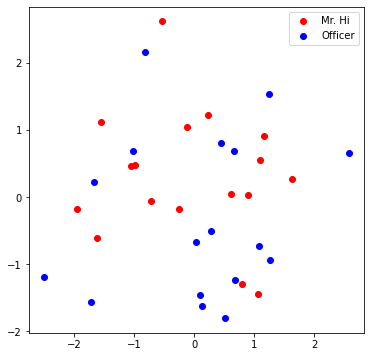

In [26]:
visualize_emb(emb)